## Логистическая регрессия

Импортируем библиотеки под более удобным именем.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем наш датасет, который получили после этапа подготовки данных. Стоит отметить, что мне пришлось создать собственную переменную для классификации Industry_Income, где значение YES при уровне дохода выше 39,4 пунктов (пусть будут "Высокий доход"), NO - при более низком доходе("Низкий доход"). Напомню, что эта переменная показывает какой доход от исследований университет получает и его способность привлекать финансирование на коммерческом рынке. Эта оценка для удобства приведена к 100-балльной шкале. Таким образом, классификация поможет нам понять в случае появления нового университета его принадлежность к той или иной категории.

In [8]:
df = pd.read_csv('University_prep_kl.csv', sep=';')
df

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Citations,GDP,Industry_Income
0,20664,11.2,8472.0,0.46,0.54,90.5,98.4,41627.0,YES
1,2240,6.4,672.0,0.34,0.66,92.1,97.9,60236.0,YES
2,18978,10.9,7022.0,0.47,0.53,91.4,95.8,41627.0,YES
3,16135,7.3,3711.0,0.43,0.57,92.8,99.9,60236.0,YES
4,11247,8.6,3824.0,0.39,0.61,90.5,99.5,60236.0,YES
...,...,...,...,...,...,...,...,...,...
1351,20174,17.8,0.0,0.55,0.45,16.2,6.1,14064.0,NO
1352,34101,21.3,0.0,0.57,0.43,15.3,6.7,14064.0,NO
1353,15236,11.1,3.0,0.63,0.37,17.0,4.5,28053.0,NO
1354,17101,24.9,0.0,0.54,0.46,13.8,7.6,14064.0,NO


Пропишем функцию для кодирования.

In [9]:
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

Применяем её к нашим данным. 

In [10]:
df = encoding_char(df)
df

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Citations,GDP,Industry_Income
0,20664,11.2,8472.0,0.46,0.54,90.5,98.4,41627.0,0
1,2240,6.4,672.0,0.34,0.66,92.1,97.9,60236.0,0
2,18978,10.9,7022.0,0.47,0.53,91.4,95.8,41627.0,0
3,16135,7.3,3711.0,0.43,0.57,92.8,99.9,60236.0,0
4,11247,8.6,3824.0,0.39,0.61,90.5,99.5,60236.0,0
...,...,...,...,...,...,...,...,...,...
1351,20174,17.8,0.0,0.55,0.45,16.2,6.1,14064.0,1
1352,34101,21.3,0.0,0.57,0.43,15.3,6.7,14064.0,1
1353,15236,11.1,3.0,0.63,0.37,17.0,4.5,28053.0,1
1354,17101,24.9,0.0,0.54,0.46,13.8,7.6,14064.0,1


Проверим сбалансированность выборки с помощью визуализации. Видим, что она сбалансирована.

<AxesSubplot:ylabel='Frequency'>

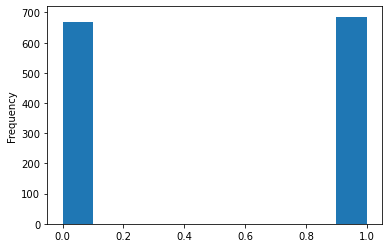

In [11]:
df['Industry_Income'].plot(kind = 'hist')

Разбиваем датасет на обучающую и тестовую выборки в соотношении 80%/20%.

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Для работы с логистической регрессией нам нужны шкалированные данные, поэтому займёмся этим.

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Построим базовую модель логистической регрессии, заодно посмотрим на значимость каждой переменной. Видим, что у нас наиболее значимые Количество студентов на преподавателя, % женщин, % мужчин и уровень преподавания.

In [14]:
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.564815
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.184     
Dependent Variable: y                AIC:              1240.5184 
Date:               2021-12-09 13:55 BIC:              1280.4257 
No. Observations:   1084             Log-Likelihood:   -612.26   
Df Model:           7                LL-Null:          -750.77   
Df Residuals:       1076             LLR p-value:      4.8301e-56
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.1386      0.0811     1.7087    0.0875    -0.0204     0.2976
x2    -0.3472      0.0854    -4.0651    0.0000    -0.5

Теперь неоходимо провести отбор переменных. Это можно автоматизировать, прописав функцию, а можно сделать вручную. Получили 3 значимых переменных Numb_students_per_Staff, Percentage_Female, Teaching.

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

3
[False  True False  True False  True False False]
[3 1 4 1 2 1 5 6]


In [16]:
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[1, 3, 5]
№	Index	Feature
0	1	Numb_students_per_Staff
1	3	Percentage_Female
2	5	Teaching


Оставляем только отобранные переменные.

In [17]:
X_train_select=X_train[:, selected_columns]
X_test_select=X_test[:, selected_columns]

In [18]:
X_train = X_train[:,[False, True, False, True, False, True, False, False]]
X_test = X_test[:,[False, True, False, True, False, True, False, False]]

Строим логистическую регрессию только на значимых факторах.

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [20]:
y_pred = lr.predict(X_test)

In [21]:
lr.score(X_test,y_test)

0.6801470588235294

Посмотрим на матрицу сопряженности. Видим, что модель 185 объектов распознала верно и 87 нет. Точность модели: 68,1%. Доля ошибок: 31,9%. 

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[92 54]
 [33 93]]


"Консервируем" наш результат.

In [23]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

## Классификация с помощью логистической регрессии определила, что 92 университета относятся к высокодоходным, а 93 - к низкодоходным. При этом 87 заведений были ошибочно отнесены к категориям. Классификация проводится на основе количества студентов на 1 сотрудника, % женщин и уровня преподавания. В итоге с точностью почти 68,1% мы можем определять принадлежность университета к ВУЗам с высоким или низким доходом.